영문 문서 제목의 키워드 분석하기!
전처리 + 워드클라우드

**워드클라우드란
텍스트 분석에서 많이 사용하는 시각화 기법
출현 빈도가 높을수록 단어를 크게 나타냄



In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

pd.__version__
#그리기 위한 데이터 전처리
all_files_data_concat = pd.read_csv("riss_bigdata(1).csv", encoding='utf-8')
#제목을 추출하여 어떻게 작성되었는지 살펴보자
all_title = all_files_data_concat['제목']
all_title

#
# #(단어:빈도수)를 가지는 딕셔너리 객체 word_counter
#
# #워드클라우드 생성
# wordCloud = WordCloud(
#     width =400,
#     height = 400,
#     max_font_size=100,
#     background_color='white'
# ).generate_from_frequencies(word_count) #

0       Big-data: transformation from heterogeneous da...
1       `Big data' and the analytics course Given stud...
2       Editorial Commentary: "Mo' Data, Mo' Problems"...
3       Impact of WeChat public platforms on blood don...
4             Architecting Time-Critical Big-Data Systems
                              ...                        
996      Envisioning the future of ‘big data’ biomedicine
997     Behavioral Implications of Big Data's Impact o...
998            Human neuroimaging as a “Big Data” science
999     Consumer Research with Big Data: Applications ...
1000        The Ethics of Biomedical 'Big Data' Analytics
Name: 제목, Length: 1001, dtype: object

In [7]:
#불용어 전처리
import nltk
nltk.download('stopwords')

#stopwords.words("english")sms nltk.corpus에서 제공하는 영어 불용어 리스트를 리턴
stopWords = set(stopwords.words('english'))

#표제어 추출 작업을 제공하는 WordNetLemmatizer 객체를 만든다...
lemma = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

words=[]

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in
                                   stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in
                                            EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print("---"*3)
print(words)

print("---"*3)
words2 = list(reduce(lambda x, y: x+y, words))
words

#제목에 대한 데이터 전처리가 끝났다. 이제부터 분석을 한다,,,ㄷㄷ

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---------
[['big', 'data', 'transformation', 'heterogeneous', 'data', 'semantically', 'enriched', 'simplified', 'data'], ['big', 'data', 'analytics', 'course', 'given', 'student', 'expectation', 'industry', 'demand', 'time', 'frame', 'content', 'make', 'analytics', 'course', 'big', 'data', 'friendly'], ['editorial', 'commentary', 'mo', 'data', 'mo', 'problem', 'big', 'data', 'national', 'database', 'study', 'orthopaedic', 'research', 'concern', 'generalizability'], ['impact', 'wechat', 'public', 'platform', 'blood', 'donation', 'behavior', 'big', 'data', 'based', 'study'], ['architecting', 'time', 'critical', 'big', 'data', 'system'], ['oracle', 'sparc', 'accelerates', 'big', 'data', 'oracle', 'recent', 'sparc', 'processor', 'integrate', 'hardware', 'acceleration', 'database', 'software', 'big', 'data', 'analytics', 'security', 'also', 'enable', 'compression', 'memory', 'database'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'],

[['big',
  'data',
  'transformation',
  'heterogeneous',
  'data',
  'semantically',
  'enriched',
  'simplified',
  'data'],
 ['big',
  'data',
  'analytics',
  'course',
  'given',
  'student',
  'expectation',
  'industry',
  'demand',
  'time',
  'frame',
  'content',
  'make',
  'analytics',
  'course',
  'big',
  'data',
  'friendly'],
 ['editorial',
  'commentary',
  'mo',
  'data',
  'mo',
  'problem',
  'big',
  'data',
  'national',
  'database',
  'study',
  'orthopaedic',
  'research',
  'concern',
  'generalizability'],
 ['impact',
  'wechat',
  'public',
  'platform',
  'blood',
  'donation',
  'behavior',
  'big',
  'data',
  'based',
  'study'],
 ['architecting', 'time', 'critical', 'big', 'data', 'system'],
 ['oracle',
  'sparc',
  'accelerates',
  'big',
  'data',
  'oracle',
  'recent',
  'sparc',
  'processor',
  'integrate',
  'hardware',
  'acceleration',
  'database',
  'software',
  'big',
  'data',
  'analytics',
  'security',
  'also',
  'enable',
  'compress

In [8]:
#단어 빈도를.... 구해보자
#words2 리스트에 있는 단어별로 출현 횟수를 계산하여 딕셔너리 객체인 count를 생성 Counter( )

count = Counter(words2) #딕셔너리객체 생성 => 단어의 빈도수를 count해줌
count


Counter({'big': 974,
         'data': 1101,
         'transformation': 8,
         'heterogeneous': 7,
         'semantically': 2,
         'enriched': 2,
         'simplified': 2,
         'analytics': 63,
         'course': 5,
         'given': 2,
         'student': 4,
         'expectation': 2,
         'industry': 13,
         'demand': 5,
         'time': 22,
         'frame': 2,
         'content': 4,
         'make': 3,
         'friendly': 2,
         'editorial': 9,
         'commentary': 3,
         'mo': 4,
         'problem': 8,
         'national': 6,
         'database': 12,
         'study': 23,
         'orthopaedic': 3,
         'research': 40,
         'concern': 3,
         'generalizability': 2,
         'impact': 16,
         'wechat': 3,
         'public': 14,
         'platform': 28,
         'blood': 2,
         'donation': 2,
         'behavior': 12,
         'based': 95,
         'architecting': 2,
         'critical': 8,
         'system': 47,
         'orac

In [42]:
# 출현 횟수가 많은 상위 50개 단어count.most_common(50) 중에서 단어 길이가 1보다 큰 것만 word_count 딕셔너리에 저장한 후 출력

word_count= dict()
for tag, counts in count.most_common(50):
    if(len(str(tag)) >1) :
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))
print(word_count)


data : 1101
big : 974
nan : 101
based : 95
driven : 79
analysis : 77
analytics : 63
approach : 53
using : 48
challenge : 48
system : 47
application : 41
research : 40
model : 32
new : 31
learning : 30
management : 30
science : 29
issue : 29
platform : 28
framework : 28
opportunity : 28
information : 28
social : 28
era : 28
health : 27
technology : 27
network : 26
future : 25
small : 25
method : 24
study : 23
making : 23
time : 22
review : 22
energy : 22
real : 21
decision : 21
optimization : 21
smart : 21
use : 20
prediction : 20
service : 20
revolution : 20
process : 19
cloud : 19
business : 19
performance : 19
mining : 19
algorithm : 19
{'data': 1101, 'big': 974, 'nan': 101, 'based': 95, 'driven': 79, 'analysis': 77, 'analytics': 63, 'approach': 53, 'using': 48, 'challenge': 48, 'system': 47, 'application': 41, 'research': 40, 'model': 32, 'new': 31, 'learning': 30, 'management': 30, 'science': 29, 'issue': 29, 'platform': 28, 'framework': 28, 'opportunity': 28, 'information': 28, 's

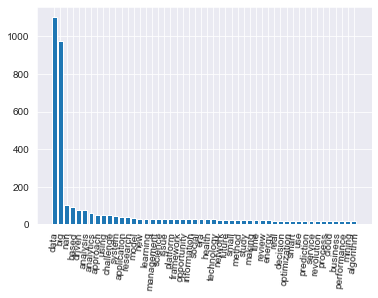

In [43]:
# 히스토그램을 그리기 위해 matplotlib.pyplot을 사용, 히스토그램의 크기 figure( )를 지정하고
# x축 레이블xlabel( )과 y축 레이블ylabel( )을 지정, 상위 50개만 저장한 word_count 딕셔너리에서
# x축 값으로 사용할 sorted_Keys와 y축 값으로 사용할 sorted_Values를 역순으로 정렬하여reverse=True 준비
# x축 눈금plt.xticks은 sorted_Keys 리스트의 값(상위 50개 단어)을 순서대로 사용
# 설정 사항을 적용하여 히스토그램을 그림plt.show( ).
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True) #x값
sorted_Values = sorted(word_count.values(), reverse = True) #y값
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()


In [36]:
# word_count 딕셔너리에서 data랑 big을 빼고 히스토그램 그리기
del(word_count['data'], word_count['big'])
print(word_count)


KeyError: 'data'

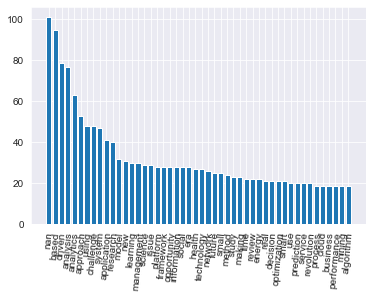

In [37]:
# word_count 딕셔너리에서 data랑 big을 빼고 히스토그램 그리기
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True) #x값
sorted_Values = sorted(word_count.values(), reverse = True) #y값
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [38]:
#all_files_data_concat에 doc_count 컬럼을 추가한 뒤 ‘출판일’ 컬럼을 기준 으로 그룹을 만들고groupby( ),
# 그룹별 데이터 개수count( )를 doc_count 컬럼에 저장하여 summary_year 리스트를 생성

all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year #출력하여 내용 확인


,출판일,doc_count
0,2003.0,1
1,2011.0,8
2,2012.0,25
3,2013.0,55
4,2014.0,138
5,2015.0,94
6,2016.0,117
7,2017.0,122
8,2018.0,111
9,2019.0,75


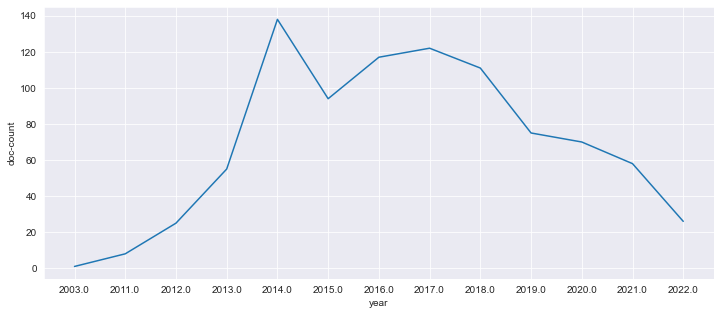

In [39]:
#summary_year의 doc_count 컬럼을 차트의 y축으로 설정하고 plt.plot( ), ‘출판일’ 컬럼은 x축으로 설정하여 plt.xticks( ) 차트를 그림

plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']]) #x축 값 설쩡....
plt.show()


이제 진짜로 워드클라우드를 그리자!!

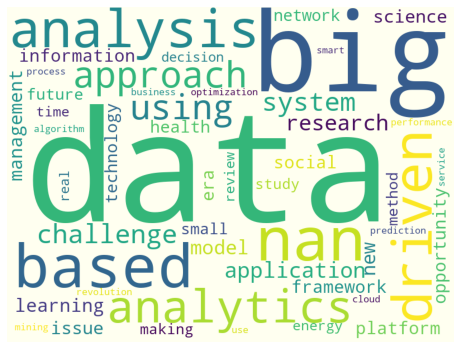

In [45]:
# 워드클라우드에서 처리할 불용어를 설정하고 set(STOPWORDS), 워드클라우드 객체를 생성 WordCloud( )워드클라우드 객체인 wc에 word_count 데이터를 담아서 wc.generate_ from_frequencies( ) cloud 객체를 생성
# 생성한 워드클라우드는 matplotlib.pyplot을 사용하여 나타냄

stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드를 jpg 파일로 저장to_file()
cloud.to_file("/riss_bigdata_wordCloud.jpg")
